In [16]:
# Step 0: Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


In [3]:
# Step 1: Data sources

df_train_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_train.csv")

df_test_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_test.csv")

In [4]:
# Step 1.1: Data peek

df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1047 non-null   float64
 1   Fare        1047 non-null   float64
 2   Sex_n       1047 non-null   float64
 3   Embarked_n  1047 non-null   float64
 4   FamMembers  1047 non-null   float64
 5   Survived    1047 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 49.2 KB


In [5]:
df_train_raw.sample(10)

,Pclass,Fare,Sex_n,Embarked_n,FamMembers,Survived
940,1.0,0.042990,1.0,0.333333,0.2,1
114,1.0,0.015127,1.0,0.333333,0.0,1
897,0.0,0.432884,0.0,0.333333,0.1,0
117,1.0,0.014102,0.0,0.666667,0.0,0
989,1.0,0.020421,1.0,0.333333,0.1,0
582,1.0,0.054457,1.0,0.333333,0.5,0
229,1.0,0.015379,0.0,1.000000,0.0,0
215,0.0,0.057971,0.0,0.666667,0.0,0
549,0.0,0.221098,1.0,0.666667,0.1,1
889,1.0,0.014110,0.0,0.666667,0.0,0


In [6]:
df_train_raw.describe()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers,Survived
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,0.639924,0.065090,0.352436,0.458453,0.089876,0.373448
std,0.422538,0.095353,0.477957,0.213593,0.161945,0.483951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.015412,0.000000,0.333333,0.000000,0.000000
50%,1.000000,0.028213,0.000000,0.333333,0.000000,0.000000
75%,1.000000,0.063261,1.000000,0.666667,0.100000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
naive_data = df_train_raw.Survived.to_list()
naive_data

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,


In [8]:
prediction = 0

for i in range(len(naive_data)):
    if naive_data[i] == 0:
        prediction += 1

result = prediction / len(naive_data) # accurate predictions / number of predictions

print(f"Accuracy of prediction: {result*100}%")

Accuracy of prediction: 62.6552053486151%


In [9]:

X_train = df_train_raw.drop(['Survived'], axis=1)
y_train = df_train_raw.Survived

X_test = df_test_raw.drop(['Survived'], axis=1)
y_test = df_test_raw.Survived

In [10]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [11]:
# Prediction

y_hat = model.predict(X_test)
y_hat

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [12]:
comparison = accuracy_score(y_test, y_hat)
comparison

0.851145038167939

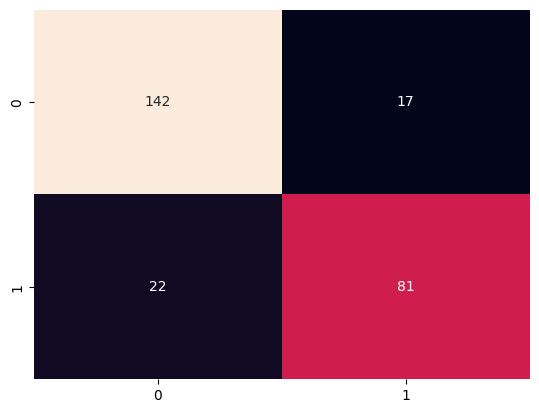

In [14]:
cm = confusion_matrix(y_test, y_hat)
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df, annot=True, fmt='d', cbar=False)
plt.show()

In [15]:
acc = (142+81) / (142+22+17+81)
acc

0.851145038167939

In [ ]:
# True positive = prediction matches reality (0, 0) = 142
# True negative = prediction doesn't match reality (1, 1) = 81
# False positive = (1, 0) = 22
# False negative = (0, 1) = 17
# accuracy = (TP + TN) / (TP + TN + FP + FN)

In [20]:
hyper_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2', 'elasticnet', None], 'solver': ['newton_cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid = GridSearchCV(model, hyper_params, scoring='accuracy', cv=5)
grid


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton_cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [21]:
grid.fit(X_train, y_train)

/workspaces/ML_primer/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/workspaces/ML_primer/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/workspaces/ML_primer/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/workspaces/ML_primer/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/workspaces/ML_primer/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/workspaces/ML_primer/.venv/lib/python3.10/site-pa

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton_cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [22]:
grid.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}

In [24]:
final_model = LogisticRegression(penalty='l2', C=0.001, solver='lbfgs', class_weight='balanced')
final_model.fit(X_train, y_train)
final_y_hat = final_model.predict(X_test)
final_acc = accuracy_score(y_test, final_y_hat)
final_acc

0.8473282442748091